# Bar Graph

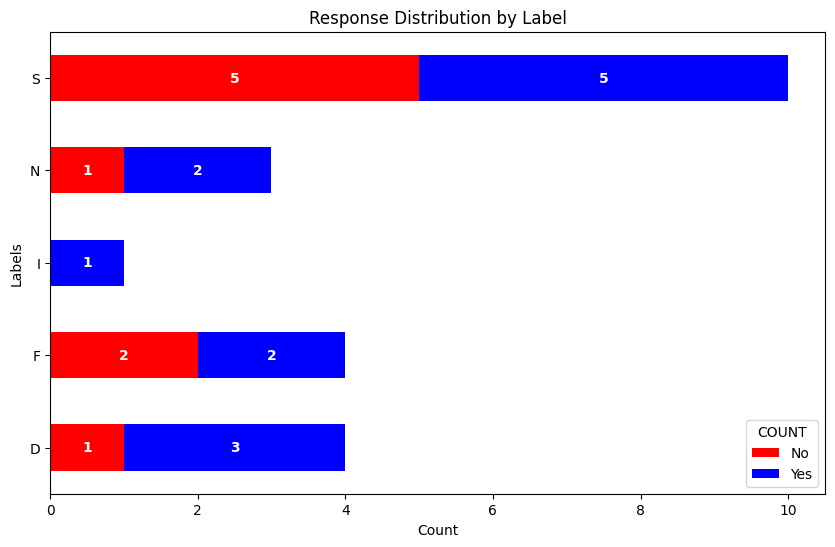

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

df_bar = pd.read_csv("data/bar_assignment.csv")

df_bar['COUNT'] = df_bar['COUNT'].replace({1: 'Yes', 0: 'No'})

summary = df_bar.groupby(['LABEL', 'COUNT']).size().unstack(fill_value=0)

ax = summary.plot(kind='barh', stacked=True, color=['red', 'blue'], figsize=(10, 6))

plt.xlabel('Count')
plt.ylabel('Labels')
plt.title('Response Distribution by Label')

def add_value_labels(ax):
    for rect in ax.containers:
        for bar in rect:
            width = bar.get_width()
            x = bar.get_x() + width/2
            y = bar.get_y() + bar.get_height()/2
            
            if width > 0:
                label = int(width)
                ax.text(x, y, label, 
                       ha='center', va='center',
                       color='white', fontweight='bold')

add_value_labels(ax)

plt.show()

# Sankey Diagram

In [45]:
import pandas as pd
import plotly.graph_objects as go

file_path = "data/sankey_assignment.csv"
df = pd.read_csv(file_path)

source_labels = ["PS", "OMP", "CNP", "NRP", "NMCCC", "PEC", "NCDM", "RGS"]
middle_labels = df["LABEL"].tolist()
target_labels = ["Reg", "Aca", "Oth"]

all_labels = source_labels + middle_labels + target_labels

sources_raw, targets_raw, values = [], [], []

for src in source_labels:
    for idx, row in df.iterrows():
        sources_raw.append(src)
        targets_raw.append(row["LABEL"])
        values.append(row[src])

for tgt in target_labels:
    for idx, row in df.iterrows():
        sources_raw.append(row["LABEL"])
        targets_raw.append(tgt)
        values.append(row[tgt])

source_indices = [all_labels.index(src) for src in sources_raw]
target_indices = [all_labels.index(tgt) for tgt in targets_raw]

node_colors = {
    "PS": "#f28e2c", "OMP": "#6c91c2", "CNP": "#ffbe7a", "NRP": "#a1d99b",
    "NMCCC": "#e15759", "PEC": "#bcbd22", "NCDM": "#ff9896", "RGS": "#9467bd",
    "S": "#87CEEB", "F": "#5B7D91", "D": "#59a4a8", "N": "#4682B4", "I": "#007BA7",
    "Reg": "#2ca02c", "Aca": "#64c364", "Oth": "#8cba68"
}
default_color = "lightgrey"
node_colors_list = [node_colors.get(label, default_color) for label in all_labels]
link_colors = [node_colors.get(src, default_color) for src in sources_raw]


fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=20,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=all_labels,
        color=node_colors_list
    ),
    link=dict(
        source=source_indices,
        target=target_indices,
        value=values,
        color=link_colors
    )
)])


fig.update_layout(
    title_text="Sankey Diagram",
    font=dict(
        family="Arial",  
        size=16,               
        color="black",
    ),
    title_x=0.5,  
    height=600,
    width=1000
)

fig.show()

# Network Graph

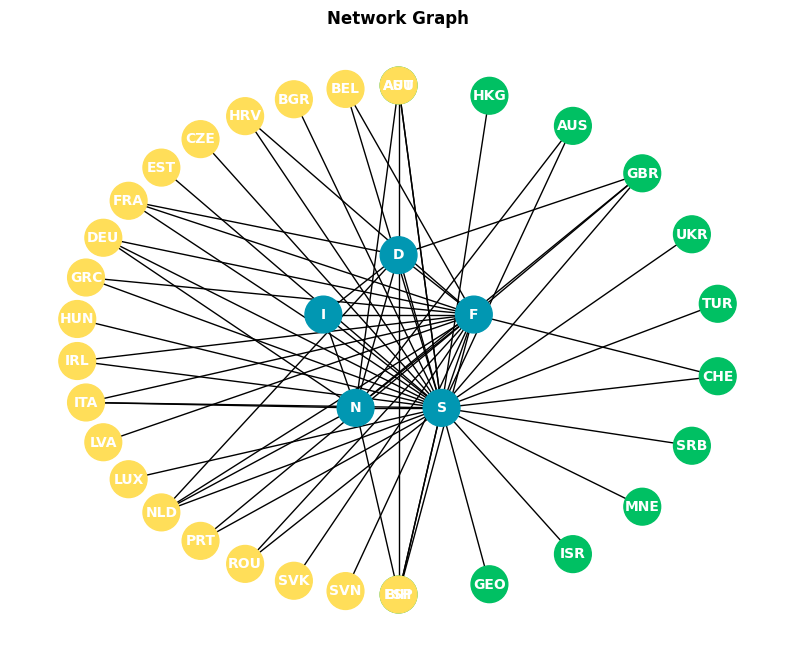

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

plt.rcParams['font.family'] = 'DejaVu Sans'

file_path = "data/networks_assignment.csv"
df = pd.read_csv(file_path)

blue_nodes = ['D', 'F', 'I', 'N', 'S']  
green_nodes = ['BIH', 'GEO', 'ISR', 'MNE', 'SRB', 'CHE', 'TUR', 'UKR', 'GBR', 'AUS', 'HKG', 'ASU']
yellow_nodes = ['AUT', 'BEL', 'BGR', 'HRV', 'CZE', 'EST', 'FRA', 'DEU', 'GRC', 'HUN', 'IRL',
                'ITA', 'LVA', 'LUX', 'NLD', 'PRT', 'ROU', 'SVK', 'SVN', 'ESP']

all_nodes = blue_nodes + green_nodes + yellow_nodes

def find_distance_networks(source, target):
    try:
        return df.loc[df['LABELS'] == source, target].values[0]
    except (IndexError, KeyError):
        return 0

def find_edges(collection, source_group, target_group):
    for s in source_group:
        for t in target_group:
            if find_distance_networks(s, t) > 0:
                collection.append((s, t))

edges_bb = []  
edges_bg = []  
edges_by = []  

find_edges(edges_bb, blue_nodes, blue_nodes)
find_edges(edges_bg, blue_nodes, green_nodes)
find_edges(edges_by, blue_nodes, yellow_nodes)

edges = edges_bb + edges_bg + edges_by

G = nx.Graph()
G.add_nodes_from(all_nodes)
G.add_edges_from(edges)

pos = {}

pos.update({
    'D': np.array([0, 0.5]),
    'F': np.array([0.35, 0.15]),
    'I': np.array([-0.35, 0.15]),
    'N': np.array([-0.20, -0.4]),
    'S': np.array([0.20, -0.4])
})

r_outer = 1.5  

num_green = len(green_nodes)
for i, node in enumerate(green_nodes):

    if num_green > 1:
        angle = -np.pi/2 + (np.pi * i / (num_green - 1))
    else:
        angle = 0
    pos[node] = np.array([np.cos(angle) * r_outer, np.sin(angle) * r_outer])

num_yellow = len(yellow_nodes)
for i, node in enumerate(yellow_nodes):

    if num_yellow > 1:
        angle = np.pi/2 + (np.pi * i / (num_yellow - 1))
    else:
        angle = np.pi
    pos[node] = np.array([np.cos(angle) * r_outer, np.sin(angle) * r_outer])

node_color_mapping = {}
for node in blue_nodes:
    node_color_mapping[node] = '#0197B2'  
for node in green_nodes:
    node_color_mapping[node] = '#00C063'  
for node in yellow_nodes:
    node_color_mapping[node] = '#FFDE59'  

node_colors = [node_color_mapping[node] for node in G.nodes()]

plt.figure(figsize=(10, 8))

nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=700)

nx.draw_networkx_edges(G, pos, edge_color='black')

nx.draw_networkx_labels(
    G, pos,
    font_size=10,
    font_color='white',
    font_weight='bold'
)

plt.title("Network Graph", fontdict={
    'fontsize': 12,
    'fontweight': 'bold',
    'fontfamily': 'DejaVu Sans'
})

plt.axis('off')
plt.show()

# Collated Graphs